In [1]:
import sys
sys.path.append('../../build')

In [2]:
import time

In [3]:
import numpy as np
import scipy.sparse as sp
import simpl as MySimplex
from simplicialx.simplicial import SimplicialComplex

In [4]:
games = []

with open("ten_games_bin_matrices.txt", "r") as file:
  games = []
  while True:
    description = file.readline()
    if description == "":
      break
    game = []
    while True:
      move = []
      while True:
        line = file.readline()
        if line == "Next turn\n":
          break
        move.append(list(map(int, line.split())))
      game.append(move)
      next = file.readline()
      if next == "End\n":
        break
    games.append(game)

In [5]:
my_simpl = MySimplex.SimplicialComplex()
other_simpl = SimplicialComplex()

In [6]:
def AddMineSimplex(my_simpl, simplex):
  my_simpl.AddSimplex(simplex)
      
def AddOtherSimplex(other_simpl, simplex):
  other_simpl.add(simplex)
  
def AddMineGame(game_index=0):
  my_simpl = MySimplex.SimplicialComplex()
  
  first_game = games[game_index]
  for move in first_game:
    for figure in move:
      indices = [i for i, x in enumerate(figure) if x == 1]
      if indices != []:
        AddMineSimplex(my_simpl, indices)
  return my_simpl
  
def AddOtherGame(game_index=0):
  other_simpl = SimplicialComplex()
  
  first_game = games[game_index]
  for move in first_game:
    for figure in move:
      indices = [i for i, x in enumerate(figure) if x == 1]
      if indices != []:
        AddOtherSimplex(other_simpl, indices)
  return other_simpl
     

In [7]:
for i, game in enumerate(games):
  print(f"Number of moves in {i}th, game: {len(game)}")

Number of moves in 0th, game: 37
Number of moves in 1th, game: 72
Number of moves in 2th, game: 65
Number of moves in 3th, game: 102
Number of moves in 4th, game: 60
Number of moves in 5th, game: 41
Number of moves in 6th, game: 151
Number of moves in 7th, game: 149
Number of moves in 8th, game: 63
Number of moves in 9th, game: 59


In [8]:
%%time
my_simpl = AddMineGame(0)

CPU times: user 13.2 s, sys: 29.7 ms, total: 13.2 s
Wall time: 13.2 s


In [9]:
%%time
other_simpl = AddOtherGame(0)

CPU times: user 15.7 s, sys: 72.2 ms, total: 15.8 s
Wall time: 16 s


In [10]:
my_simpl.FVector()

[(0, 56),
 (1, 600),
 (2, 2131),
 (3, 4994),
 (4, 9333),
 (5, 14221),
 (6, 17635),
 (7, 17730),
 (8, 14390),
 (9, 9362),
 (10, 4822),
 (11, 1925),
 (12, 575),
 (13, 121),
 (14, 16),
 (15, 1)]

In [11]:
other_simpl.f_vector

array([   56,   600,  2131,  4994,  9333, 14221, 17635, 17730, 14390,
        9362,  4822,  1925,   575,   121,    16,     1])

### Числа Бетти

С++

In [8]:
my_simpl = AddMineGame(0)

In [9]:
%%time
my_simpl.BettiNumber(0)

CPU times: user 1.2 ms, sys: 98 µs, total: 1.3 ms
Wall time: 1.31 ms


1

In [16]:
my_simpl = AddMineGame(0)

In [17]:
%%time
my_simpl.BettiNumber(1)


CPU times: user 24 ms, sys: 1.33 ms, total: 25.3 ms
Wall time: 25.1 ms


8

In [18]:
my_simpl = AddMineGame(0)

In [19]:
%%time
my_simpl.BettiNumber(2)


CPU times: user 1.13 s, sys: 13.8 ms, total: 1.15 s
Wall time: 1.15 s


11

In [ ]:
my_simpl = AddMineGame(0)

In [ ]:
%%time
my_simpl.BettiNumber(3)

Питон

In [22]:
other_simpl = AddOtherGame(0)

In [23]:
%%time 
other_simpl.betti_number(0)

CPU times: user 14.6 ms, sys: 1.49 ms, total: 16.1 ms
Wall time: 15 ms


1

In [24]:
other_simpl = AddOtherGame(0)

In [25]:
%%time
other_simpl.betti_number(1)

CPU times: user 2.77 s, sys: 9.85 ms, total: 2.78 s
Wall time: 2.8 s


8

In [ ]:
other_simpl = AddOtherGame(0)

In [15]:
%%time
other_simpl.betti_number(2)

CPU times: user 2min 49s, sys: 268 ms, total: 2min 50s
Wall time: 2min 51s


11

In [ ]:
other_simpl = AddOtherGame(0)

In [ ]:
sys.setrecursionlimit(1000000000)

In [ ]:
%%time
other_simpl.betti_number(3)

Лапласиан

k=1

In [8]:
my_simpl = AddMineGame(0)

In [9]:
%%time 
S = my_simpl.LaplacianMatrix(1, 0, 2, False)

CPU times: user 4.99 ms, sys: 912 µs, total: 5.9 ms
Wall time: 5.93 ms


In [28]:
other_simpl = AddOtherGame(0)

In [29]:
%%time 
other_simpl.laplace_matrix(1).shape

CPU times: user 318 ms, sys: 6.18 ms, total: 324 ms
Wall time: 105 ms


(600, 600)

k=2

In [30]:
my_simpl = AddMineGame(0)

In [32]:
%%time 
S = my_simpl.LaplacianMatrix(2, 1, 3, False)

CPU times: user 11 ms, sys: 435 µs, total: 11.4 ms
Wall time: 11.3 ms


In [33]:
other_simpl = AddOtherGame(0)

In [34]:
%%time 
other_simpl.laplace_matrix(2).shape

CPU times: user 2.18 s, sys: 52.8 ms, total: 2.23 s
Wall time: 790 ms


(2131, 2131)

k=3

In [10]:
my_simpl = AddMineGame(0)

In [11]:
%%time 
S = my_simpl.LaplacianMatrix(3, 2, 4, False)

CPU times: user 20.1 ms, sys: 1.08 ms, total: 21.2 ms
Wall time: 21.2 ms


In [10]:
other_simpl = AddOtherGame(0)

In [11]:
%%time 
other_simpl.laplace_matrix(3).shape

CPU times: user 14 s, sys: 299 ms, total: 14.2 s
Wall time: 5.21 s


(4994, 4994)

eigen k = 3

In [15]:
my_simpl = AddMineGame(0)

In [16]:
%%time 
b = my_simpl.EigenValues(3, 2, 4, False, 4993)

CPU times: user 3min 6s, sys: 3.71 s, total: 3min 10s
Wall time: 29.8 s


In [17]:
my_simpl = AddMineGame(0)

In [18]:
%%time
c = my_simpl.EigenValuesAll(3, 2, 4, False)

CPU times: user 49.5 s, sys: 1.5 s, total: 51 s
Wall time: 7.82 s


In [19]:
other_simpl = AddOtherGame(0)

In [20]:
%%time 
a=other_simpl.laplacian_spectra(k=3)

CPU times: user 1min 3s, sys: 1.81 s, total: 1min 4s
Wall time: 13.6 s


k=3, p=1, q=5, w=0

In [38]:
my_simpl = AddMineGame(0)

In [41]:
%%time 
S = my_simpl.LaplacianMatrix(3, 1, 5, False)

CPU times: user 95.3 ms, sys: 17.2 ms, total: 112 ms
Wall time: 111 ms


In [10]:
other_simpl = AddOtherGame(0)

In [11]:
%%time 
T = other_simpl.laplace_matrix(k=3, p=2, q=2)

CPU times: user 34.2 s, sys: 344 ms, total: 34.6 s
Wall time: 22.8 s


k=3, p=1, q=5, w=1

In [12]:
my_simpl = AddMineGame(0)

In [13]:
%%time 
S = my_simpl.LaplacianMatrix(3, 1, 5, True)
S.data

CPU times: user 106 ms, sys: 30.3 ms, total: 136 ms
Wall time: 144 ms


array([16., -1.,  1., ...,  1., -1., 12.])

In [74]:
other_simpl = AddOtherGame(0)

In [75]:
%%time 
T = other_simpl.laplace_matrix_weighted(k=3, p=2, q=2)

CPU times: user 2min 24s, sys: 2.91 s, total: 2min 27s
Wall time: 36.3 s


k=5, p=3, q=7

In [47]:
my_simpl = AddMineGame(0)

In [48]:
%%time 
S = my_simpl.LaplacianMatrix(5, 3, 7, False)

CPU times: user 330 ms, sys: 109 ms, total: 439 ms
Wall time: 487 ms


In [ ]:
other_simpl = AddOtherGame(0)

In [ ]:
%%time 
other_simpl.laplace_matrix(k=5, p=2, q=2).shape

k=11, p=5, q=13

In [54]:
my_simpl = AddMineGame(0)

In [55]:
%%time 
S = my_simpl.LaplacianMatrix(11, 5, 13, False)

CPU times: user 1.31 s, sys: 36.3 ms, total: 1.34 s
Wall time: 1.36 s


In [ ]:
other_simpl = AddOtherGame(0)

In [ ]:
%%time 
other_simpl.laplace_matrix(k=11, p=6, q=2).shape

k=11, p=10, q=12, w=0

In [8]:
my_simpl = AddMineGame(0)

In [9]:
%%time 
S = my_simpl.LaplacianMatrix(11, 10, 12, False)

CPU times: user 14.6 ms, sys: 1.04 ms, total: 15.7 ms
Wall time: 15.4 ms


In [52]:
other_simpl = AddOtherGame(0)

In [53]:
%%time 
other_simpl.laplace_matrix(k=11, p=1, q=1).shape

CPU times: user 2.74 s, sys: 64.2 ms, total: 2.8 s
Wall time: 1.71 s


(1925, 1925)

Boundary

k=6, p=5

In [76]:
my_simpl = AddMineGame(0)

In [78]:
%%time
tmp = np.array(my_simpl.BoundaryMatrix(6, 5))
tmp

CPU times: user 42.9 ms, sys: 1.47 ms, total: 44.3 ms
Wall time: 44 ms


array(<14221x17635 sparse matrix of type '<class 'numpy.int32'>'
	with 123445 stored elements in Compressed Sparse Row format>,
      dtype=object)

In [79]:
other_simpl = AddOtherGame(0)

In [80]:
%%time
tmp = np.array(other_simpl.boundary_operator_matrix(6, 1))
tmp.shape


CPU times: user 25 s, sys: 933 ms, total: 25.9 s
Wall time: 26.8 s


(14221, 17635)

k=8, p=4

In [83]:
my_simpl = AddMineGame(0)

In [84]:
%%time
tmp = np.array(my_simpl.BoundaryMatrix(8, 4))
tmp

CPU times: user 537 ms, sys: 13.7 ms, total: 551 ms
Wall time: 553 ms


array(<9333x14390 sparse matrix of type '<class 'numpy.int32'>'
	with 1813140 stored elements in Compressed Sparse Row format>,
      dtype=object)

In [86]:
other_simpl = AddOtherGame(0)

In [ ]:
%%time
tmp = np.array(other_simpl.boundary_operator_matrix(8, 4))
tmp.shape


Betweenness


k=1, q=2 (vertices=2d, edge=3d)

In [87]:
my_simpl = AddMineGame(0)

In [88]:
%%time
U=my_simpl.BetweennessAll(1, 2, True)

CPU times: user 2min 18s, sys: 222 ms, total: 2min 19s
Wall time: 15 s


In [89]:
other_simpl = AddOtherGame(0)

In [90]:
%%time
V = other_simpl.simplex_betweenness_centrality(p=1, q=2, weighted=True)

CPU times: user 29.4 s, sys: 68.7 ms, total: 29.5 s
Wall time: 29.7 s


k=1, q=2 (vertices=2d, edge=3d), not weighted

In [97]:
my_simpl = AddMineGame(0)

In [98]:
%%time
U=my_simpl.BetweennessAll(1, 2, False)

CPU times: user 2min 1s, sys: 240 ms, total: 2min 1s
Wall time: 14.3 s


In [95]:
other_simpl = AddOtherGame(0)

In [103]:
%%time
V = other_simpl.simplex_betweenness_centrality(p=1, q=2, weighted=False)

CPU times: user 1.7 s, sys: 2.33 ms, total: 1.71 s
Wall time: 1.72 s


Closeness

In [ ]:
my_simpl = AddMineGame(0)

In [ ]:
%%time
S=my_simpl.ClosenessAll(2, 4, True)

In [ ]:
other_simpl = AddOtherGame(0)

In [ ]:
%%time
V = other_simpl.simplex_closeness_centrality(p=2, q=4, weighted=False)

### Графики


In [8]:
import scipy.sparse as sp

In [9]:
def LaplMine(k, p, q, w):
  my_simpl = AddMineGame(0)
  start = time.time()
  L = my_simpl.LaplacianMatrix(k, p, q, w)
  end = time.time()
  return end - start

In [10]:
def LaplOther(k, p, q, w):
  other_simpl = AddOtherGame(0)
  start = time.time()
  if w == False:
    other_simpl.laplace_matrix(k, p, q)
  else:
    other_simpl.laplace_matrix_weighted(k, p, q)
  end = time.time()
  return end - start

In [12]:
x = np.arange(start=3, stop=14)

In [13]:
y1 = []
y2 = []

In [14]:
for k in x:
  cur_time = LaplMine(k, k - 2, k + 2, False)
  print(k, cur_time)
  y1.append(cur_time)
  

3 0.12456107139587402
4 0.2295548915863037
5 0.41983914375305176
6 0.529212236404419
7 0.5528988838195801
8 0.46732211112976074
9 0.29843878746032715
10 0.14205574989318848
11 0.055963993072509766
12 0.0169830322265625
13 0.00404810905456543


In [17]:
for k in x:
  cur_time = LaplOther(k, 2, 2, False)
  print(k, cur_time)
  y2.append(cur_time)
  

3 22.045618295669556


NameError: name 'y2' is not defined

In [24]:
import matplotlib.pyplot as plt


In [19]:
y1= [0.12456107139587402,
 0.2295548915863037,
 0.41983914375305176,
 0.529212236404419,
 0.5528988838195801,
 0.46732211112976074,
 0.29843878746032715,
 0.14205574989318848,
 0.055963993072509766,
 0.0169830322265625,
 0.00404810905456543]

y2 = [22.11212706565857, 74.0863950252533, 141.93740606307983, 244.08216619491577, 415.97249364852905, 230.6967008113861, 114.43729901313782, 54.59015679359436, 34.30890607833862, 4.283010005950928, 0.630958080291748]

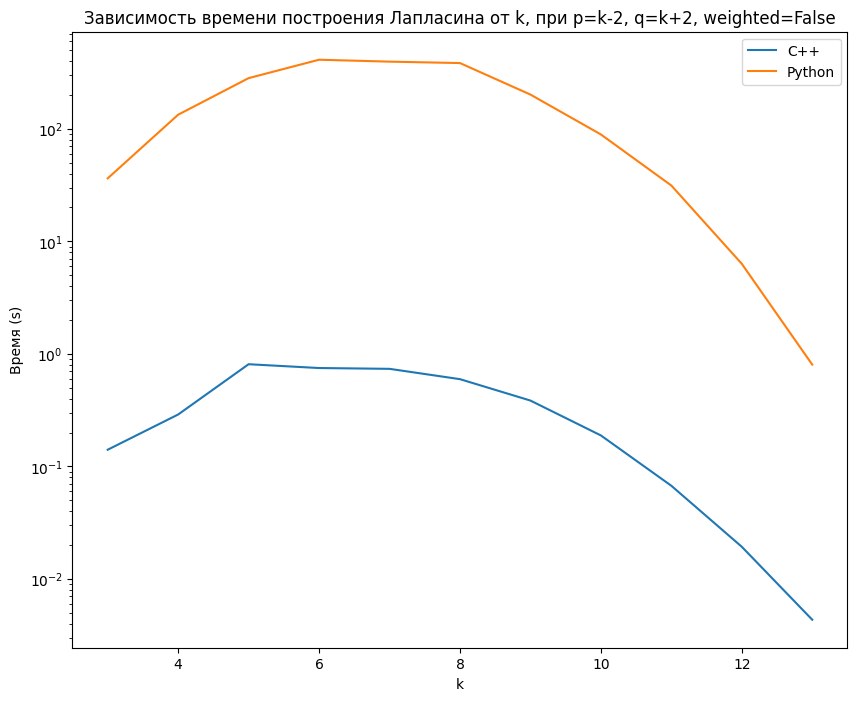

In [28]:
plt.figure(figsize=(10, 8))
plt.plot(x, y1, label ='C++')
plt.plot(x, y2, label ='Python')

plt.xlabel("k")
plt.ylabel("Время (s)")
plt.legend()
plt.title('Зависимость времени построения Лапласина от k, при p=k-2, q=k+2, weighted=False')
plt.semilogy () 

plt.show()


Eigen

In [27]:
def EigenMine(k, p, q, w):
  my_simpl = AddMineGame(0)
  start = time.time()
  my_simpl.EigenValuesAll(k, p, q, w)
  end = time.time()
  return end - start

In [28]:
def EigenOther(k, p, q, w):
  other_simpl = AddOtherGame(0)
  start = time.time()
  other_simpl.laplacian_spectra(k, p, q, w)
  end = time.time()
  return end - start

In [29]:
x = np.arange(start=3, stop=14)

In [30]:
y1 = []
y2 = []

In [31]:
for k in x:
  cur_time = EigenMine(k, k - 2, k + 2, False)
  print(k, cur_time)
  y1.append(cur_time)
  

3 9.865232944488525
4 52.64215087890625
5 160.19155097007751
6 271.61303210258484
7 249.77519297599792
8 154.88919496536255
9 45.297911167144775
10 7.556091785430908
11 0.7389161586761475
12 0.17828893661499023
13 0.01155996322631836


In [32]:
for k in x:
  cur_time = EigenOther(k, 2, 2, False)
  print(k, cur_time)
  y2.append(cur_time)
  

3 32.32259774208069
4 113.438236951828
5 293.3335280418396
6 498.9896421432495
7 493.1916489601135
8 364.4898991584778
9 156.04356217384338
10 320.5011909008026
11 18.41832971572876
12 4.149945974349976
13 0.6393489837646484


In [33]:
y1

[9.865232944488525,
 52.64215087890625,
 160.19155097007751,
 271.61303210258484,
 249.77519297599792,
 154.88919496536255,
 45.297911167144775,
 7.556091785430908,
 0.7389161586761475,
 0.17828893661499023,
 0.01155996322631836]

In [34]:
y2

[32.32259774208069,
 113.438236951828,
 293.3335280418396,
 498.9896421432495,
 493.1916489601135,
 364.4898991584778,
 156.04356217384338,
 320.5011909008026,
 18.41832971572876,
 4.149945974349976,
 0.6393489837646484]

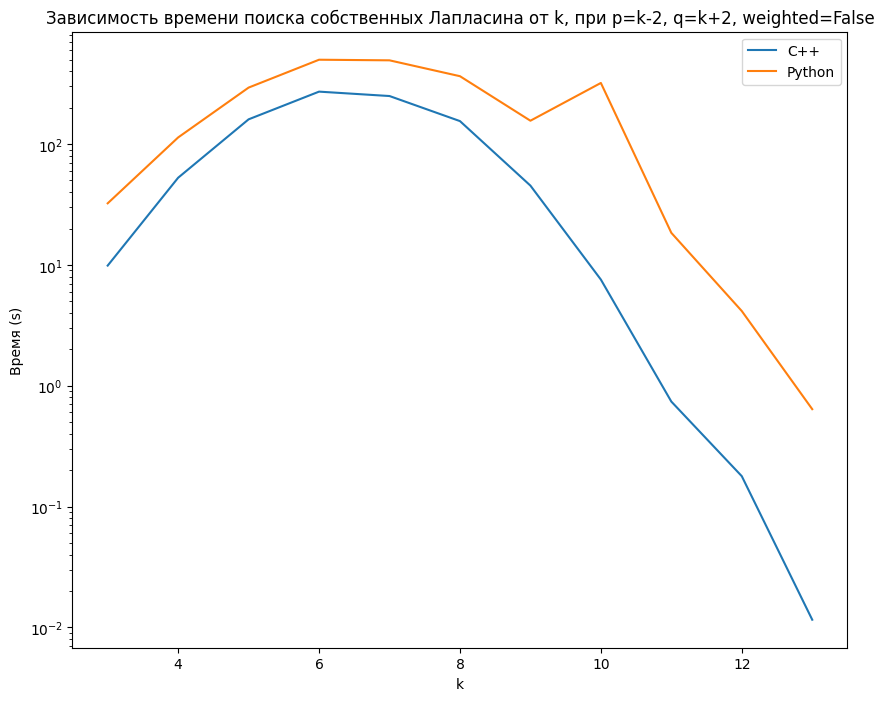

In [36]:
plt.figure(figsize=(10, 8))
plt.plot(x, y1, label ='C++')
plt.plot(x, y2, label ='Python')

plt.xlabel("k")
plt.ylabel("Время (s)")
plt.legend()
plt.title('Зависимость времени поиска собственных Лапласина от k, при p=k-2, q=k+2, weighted=False')
plt.semilogy () 

plt.show()


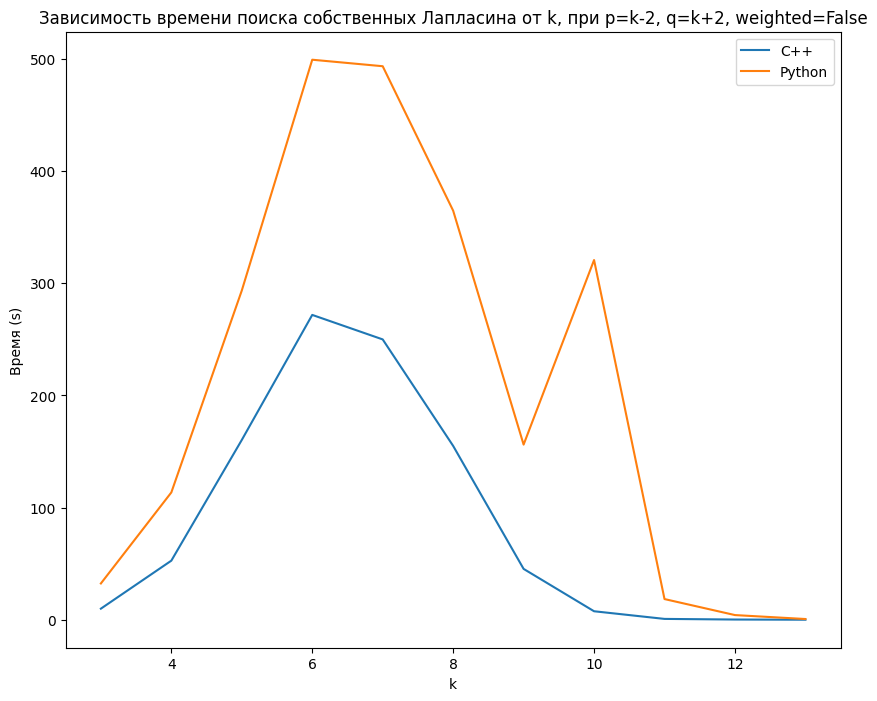

In [37]:
plt.figure(figsize=(10, 8))
plt.plot(x, y1, label ='C++')
plt.plot(x, y2, label ='Python')

plt.xlabel("k")
plt.ylabel("Время (s)")
plt.legend()
plt.title('Зависимость времени поиска собственных Лапласина от k, при p=k-2, q=k+2, weighted=False')

plt.show()


In [23]:
y1 = []
y2 = []

In [24]:
for k in x:
  cur_time = LaplMine(k, k - 2, k + 2, True)
  print(k, cur_time)
  y1.append(cur_time)
  

3 0.14080500602722168
4 0.2894930839538574
5 0.8098361492156982
6 0.7491729259490967
7 0.7368972301483154
8 0.5965919494628906
9 0.3850851058959961
10 0.18867802619934082
11 0.06738924980163574
12 0.019346952438354492
13 0.004348039627075195


In [19]:
for k in x:
  cur_time = LaplOther(k, 2, 2, True)
  print(k, cur_time)
  y2.append(cur_time)
  

3 33.89631915092468


KeyboardInterrupt: 

In [26]:
y1= [0.14080500602722168,
 0.2894930839538574,
 0.8098361492156982,
 0.7491729259490967,
 0.7368972301483154,
 0.5965919494628906,
 0.3850851058959961,
 0.18867802619934082,
 0.06738924980163574,
 0.019346952438354492,
 0.004348039627075195]

In [27]:
y2=[36.27970790863037,
 133.46775579452515,
 282.0338008403778,
 411.0457830429077,
 395.2436089515686,
 383.86784529685974,
 201.51124596595764,
 89.13411712646484,
 31.353326082229614,
 6.321484088897705,
 0.8035547733306885]

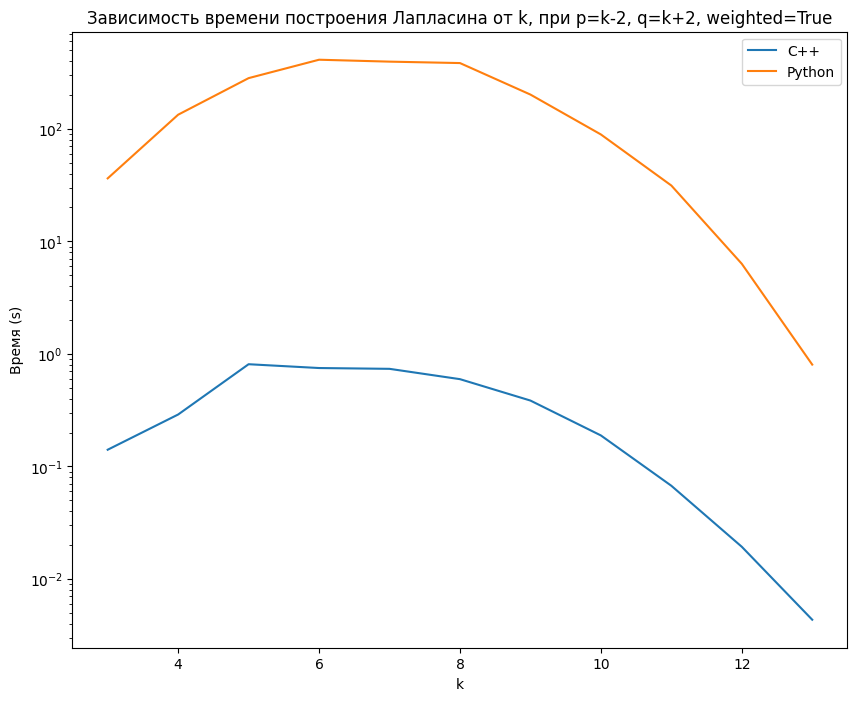

In [29]:
plt.figure(figsize=(10, 8))
plt.plot(x, y1, label ='C++')
plt.plot(x, y2, label ='Python')

plt.xlabel("k")
plt.ylabel("Время (s)")
plt.legend()
plt.title('Зависимость времени построения Лапласина от k, при p=k-2, q=k+2, weighted=True')
plt.semilogy () 
plt.show()


Boundary


In [30]:
x = np.arange(start=2, stop=16)


In [36]:
y1=[]
y2=[]

In [31]:
def BoundMine(k, p):
  my_simpl = AddMineGame(0)
  start = time.time()
  my_simpl.BoundaryMatrix(k, p)
  end = time.time()
  return end - start

In [32]:
def BoundOther(k, p):
  other_simpl = AddOtherGame(0)
  start = time.time()
  other_simpl.boundary_operator_matrix(k, p)
  end = time.time()
  return end - start

In [37]:
for k in x:
  cur_time = BoundMine(k, k - 2)
  print(k, cur_time)
  y1.append(cur_time)
  

2 0.0023641586303710938
3 0.0075359344482421875
4 0.021979808807373047
5 0.04330015182495117
6 0.07771182060241699
7 0.10388302803039551
8 0.10843181610107422
9 0.08853721618652344
10 0.05943894386291504
11 0.03130602836608887
12 0.0125732421875
13 0.0030493736267089844
14 0.0007338523864746094
15 0.0001990795135498047


In [ ]:
for k in x:
  cur_time = BoundOther(k, 2)
  print(k, cur_time)
  y2.append(cur_time)
  

In [39]:
y1=[0.0023641586303710938,
 0.0075359344482421875,
 0.021979808807373047,
 0.04330015182495117,
 0.07771182060241699,
 0.10388302803039551,
 0.10843181610107422,
 0.08853721618652344,
 0.05943894386291504,
 0.03130602836608887,
 0.0125732421875,
 0.0030493736267089844,
 0.0007338523864746094,
 0.0001990795135498047]

In [42]:
y2=[0.16742515563964844, 0.9801530838012695, 
    4.62283587455749, 19.47725200653076,
    66.19969367980957, 118.82330918312073,
    176.69122195243835, 96.88126492500305,
 53.33071303367615,
 19.85325002670288,
 4.0754852294921875,
 0.6295428276062012,
 0.0748140811920166,
 0.004664897918701172,
]

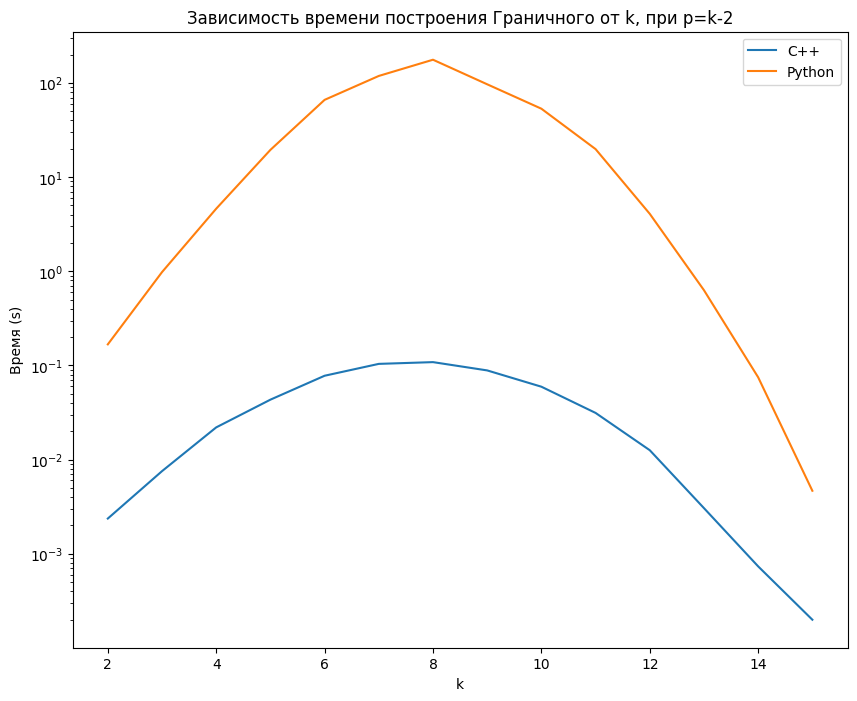

In [45]:
plt.figure(figsize=(10, 8))
plt.plot(x, y1, label ='C++')
plt.plot(x, y2, label ='Python')

plt.xlabel("k")
plt.ylabel("Время (s)")
plt.legend()
plt.title('Зависимость времени построения Граничного от k, при p=k-2')
plt.semilogy () 
plt.show()


Betweness

In [8]:
def ClosMine(p, q, w):
  my_simpl = AddMineGame(0)
  start = time.time()
  my_simpl.ClosenessAll(p, q, w)
  end = time.time()
  return end - start

In [9]:
def ClosOther(p, q, w):
  other_simpl = AddOtherGame(0)
  start = time.time()
  other_simpl.simplex_closeness_centrality(p, q, w)
  end = time.time()
  return end - start

In [14]:
x = np.arange(start=0, stop=13)

In [15]:
y1 = []
y2 = []